In [25]:
!pip install calmap

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.figure_factory as ff
import plotly.express as px
from plotly.subplots import make_subplots
from collections import defaultdict 
import calmap
plt.rcParams['figure.figsize'] = 8, 5
plt.style.use("fivethirtyeight")
pd.options.plotting.backend = "plotly"
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import re

In [27]:

data = pd.read_csv("COVID clinical trials.csv")
data.head()

,Rank,NCT Number,Title,Acronym,Status,Study Results,Conditions,Interventions,Outcome Measures,Sponsor/Collaborators,...,Other IDs,Start Date,Primary Completion Date,Completion Date,First Posted,Results First Posted,Last Update Posted,Locations,Study Documents,URL
0,1,NCT04785898,Diagnostic Performance of the ID Now™ COVID-19...,COVID-IDNow,"Active, not recruiting",No Results Available,Covid19,Diagnostic Test: ID Now™ COVID-19 Screening Test,Evaluate the diagnostic performance of the ID ...,Groupe Hospitalier Paris Saint Joseph,...,COVID-IDNow,"November 9, 2020","December 22, 2020","April 30, 2021","March 8, 2021",NaN,"March 8, 2021","Groupe Hospitalier Paris Saint-Joseph, Paris, ...",NaN,https://ClinicalTrials.gov/show/NCT04785898
1,2,NCT04595136,Study to Evaluate the Efficacy of COVID19-0001...,COVID-19,Not yet recruiting,No Results Available,SARS-CoV-2 Infection,Drug: Drug COVID19-0001-USR|Drug: normal saline,Change on viral load results from baseline aft...,United Medical Specialties,...,COVID19-0001-USR,"November 2, 2020","December 15, 2020","January 29, 2021","October 20, 2020",NaN,"October 20, 2020","Cimedical, Barranquilla, Atlantico, Colombia",NaN,https://ClinicalTrials.gov/show/NCT04595136
2,3,NCT04395482,Lung CT Scan Analysis of SARS-CoV2 Induced Lun...,TAC-COVID19,Recruiting,No Results Available,covid19,Other: Lung CT scan analysis in COVID-19 patients,A qualitative analysis of parenchymal lung dam...,University of Milano Bicocca,...,TAC-COVID19,"May 7, 2020","June 15, 2021","June 15, 2021","May 20, 2020",NaN,"November 9, 2020","Ospedale Papa Giovanni XXIII, Bergamo, Italy|P...",NaN,https://ClinicalTrials.gov/show/NCT04395482
3,4,NCT04416061,The Role of a Private Hospital in Hong Kong Am...,COVID-19,"Active, not recruiting",No Results Available,COVID,Diagnostic Test: COVID 19 Diagnostic Test,Proportion of asymptomatic subjects|Proportion...,Hong Kong Sanatorium & Hospital,...,RC-2020-08,"May 25, 2020","July 31, 2020","August 31, 2020","June 4, 2020",NaN,"June 4, 2020","Hong Kong Sanatorium & Hospital, Hong Kong, Ho...",NaN,https://ClinicalTrials.gov/show/NCT04416061
4,5,NCT04395924,Maternal-foetal Transmission of SARS-Cov-2,TMF-COVID-19,Recruiting,No Results Available,Maternal Fetal Infection Transmission|COVID-19...,Diagnostic Test: Diagnosis of SARS-Cov2 by RT-...,COVID-19 by positive PCR in cord blood and / o...,Centre Hospitalier Régional d'Orléans|Centre d...,...,CHRO-2020-10,"May 5, 2020",May 2021,May 2021,"May 20, 2020",NaN,"June 4, 2020","CHR Orléans, Orléans, France",NaN,https://ClinicalTrials.gov/show/NCT04395924


In [28]:
data["Start Date"] = pd.to_datetime(data["Start Date"])
data["Completion Date"] = pd.to_datetime(data["Completion Date"])
data["Primary Completion Date"] = pd.to_datetime(data["Primary Completion Date"])
data["Start Date"] = pd.to_datetime(data["First Posted"])
data["Start Date"] = pd.to_datetime(data["Results First Posted"])
data["Start Date"] = pd.to_datetime(data["Last Update Posted"])

In [29]:
def NullUnique(df):
    dic = defaultdict(list)
    for col in df.columns:
        dic["Feature"].append(col)
        dic["NumUnique"].append(len(df[col].unique()))
        dic["NumNull"].append(df[col].isnull().sum())
        dic["%Null"].append(round(df[col].isnull().sum()/df.shape[0] * 100,2))
    return pd.DataFrame(dict(dic)).sort_values(["%Null"],ascending=False).style.background_gradient()

In [30]:
NullUnique(data)

,Feature,NumUnique,NumNull,%Null
22,Results First Posted,34,5747,99.380000
25,Study Documents,183,5601,96.850000
3,Acronym,2339,3303,57.120000
12,Phases,9,2461,42.560000
7,Interventions,4338,886,15.320000
24,Locations,4256,585,10.120000
20,Completion Date,924,36,0.620000
19,Primary Completion Date,829,36,0.620000
16,Study Designs,268,35,0.610000
8,Outcome Measures,5688,35,0.610000


In [31]:
def popularity(col,threshold):
    idx = []
    counts = []
    other = 0
    for index,vcount in zip(data[col].value_counts().index,data[col].value_counts().values):
        if vcount < threshold:
            other += 1
            continue
        idx.append(index)
        counts.append(vcount)
    idx.append("Others")
    counts.append(other)
    return idx,counts

In [32]:
fig = px.pie(data,"Study Results")
fig.update_layout(title = "Do we have any results to study?")
fig.show()

In [33]:
fig = go.Figure(go.Bar(
    x= data.groupby("Phases").agg("count")["Rank"].sort_values(ascending=False).index, 
    y= data.groupby("Phases").agg("count")["Rank"].sort_values(ascending=False).values,  
    text=data.groupby("Phases").agg("count")["Rank"].sort_values(ascending=False).index,
    textposition = "outside", marker_color=data.groupby("Phases").agg("count")["Rank"].sort_values(ascending=False).values
))
fig.update_layout(title = "Phases across Studies")
fig.show()

In [34]:
data.Status.hist()

In [35]:
idx , counts = popularity("Interventions",8)
fig = go.Figure([go.Pie(labels = idx,values=counts,textinfo = "label+percent")])
fig.update_layout(title="What are the top Interventions?")
fig.show()

Text(0.5, 1.0, 'What Conditions are we trying to treat')

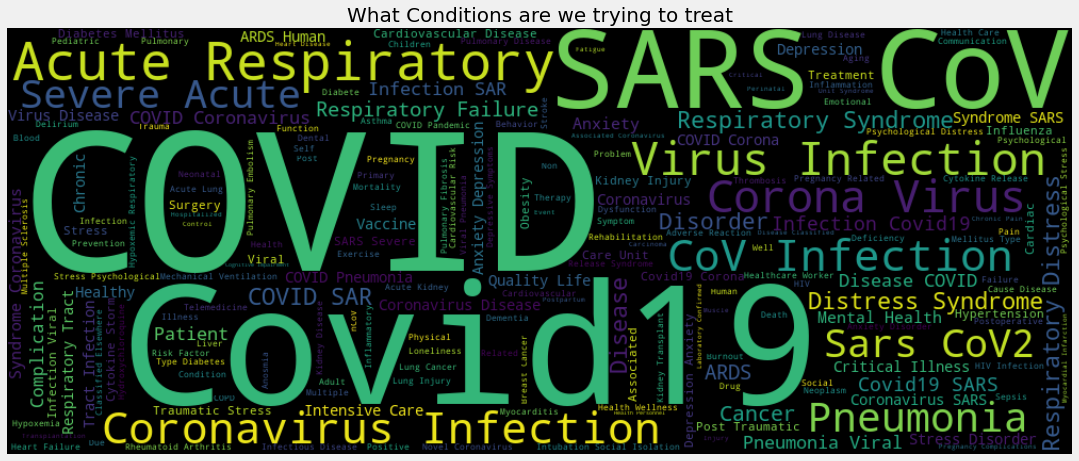

In [36]:
conditions = list(data["Conditions"].dropna().unique())
fig, (ax2) = plt.subplots(1,1,figsize = [17, 10])
wordcloud2 = WordCloud(width=1000,height = 400).generate(" ".join(conditions))
ax2.imshow(wordcloud2,interpolation="bilinear")
ax2.axis("off")
ax2.set_title("What Conditions are we trying to treat",fontsize = 20)

In [37]:
def cleanAge(age):
    if len(re.findall(r"\(.*\)",age)):
        return re.findall(r"\(.*\)",age)[0]
    return "("+age+")"

In [38]:
ageData = data.Age.apply(lambda x : cleanAge(x))
ageData.hist()

In [39]:
data["AgeBrackets"] = ageData

In [40]:
i = 0
fig = make_subplots(rows = 3, cols = 2, subplot_titles = list(pd.DataFrame(data.groupby(["AgeBrackets"])["Gender"].value_counts()).unstack().index))
for row in range(1, 4):
    for col in range(1, 3):
        dt = pd.DataFrame(data.groupby(["AgeBrackets"])["Gender"].value_counts()).unstack().iloc[i]
        fig.add_trace(go.Bar(x = dt.Gender.index, y = dt.Gender.values), row = row, col = col)        
        i += 1
fig.show()

In [41]:
data.Enrollment.hist()

In [42]:
data["Study Type"].hist()

In [43]:
def splitLoc(loc):
    return loc.split(",")[-1].strip()

In [44]:
data["Loc"] = data.Locations.apply(lambda x:splitLoc(str(x)))

In [45]:
fig = go.Figure([go.Choropleth(
    locations = data.groupby(["Loc"]).agg("count")["Rank"].index,
    z = data.groupby(["Loc"]).agg("count")["Rank"].values.astype(float),
    locationmode = "country names",
    colorscale = "Blues",
    autocolorscale = False,
    marker_line_color = "white",
    showscale = True,
)])
fig.update_layout(title = "Study Locations")
fig.show()

In [46]:
idx , counts = popularity("Funded Bys",0)
fig = go.Figure([go.Pie(labels = idx,values = counts,textinfo = "label+percent")])
fig.update_layout(title = "Who are the top Funders?")
fig.show()

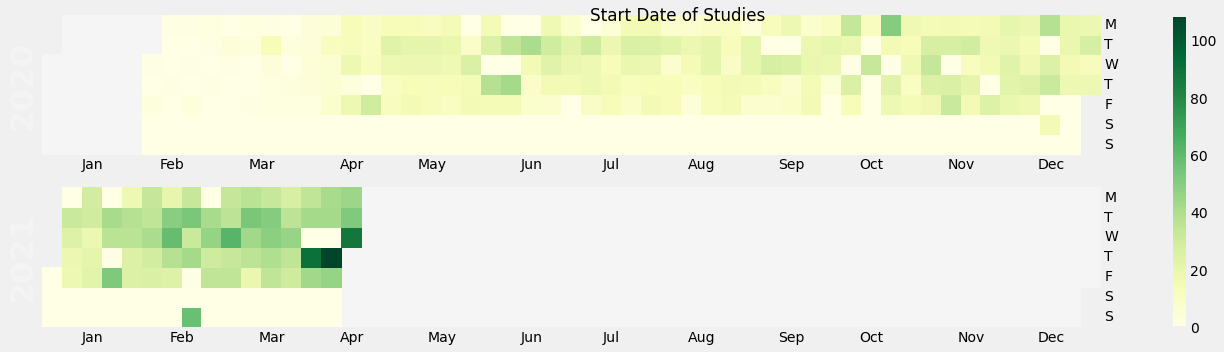

In [47]:
fig,ax = calmap.calendarplot(data.groupby(["Start Date"]).Rank.count(), monthticks = 1, daylabels = "MTWTFSS",cmap = "YlGn", linewidth = 0, fig_kws = dict(figsize = (20,5)))
fig.suptitle("Start Date of Studies")
fig.colorbar(ax[0].get_children()[1], ax = ax.ravel().tolist())
fig.show()

In [48]:
data["Completion Date"].dt.year.hist()